<a href="https://colab.research.google.com/github/supai-red/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Andrea_Christelle_142_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
#Using Pandas, assuming this is sample data
import pandas as pd
import numpy as np


sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#without dictionaries

#Mean
average_sales = sum(sales)/len(sales)
x =   np.mean(sales) 
print ("Numpy mean is", x )
print ("The average of sales is", average_sales)

#create dataframe
df = pd.DataFrame(sales)
print(df)


Numpy mean is 3052.714285714286
The average of sales is 3052.714285714286
      0
0  3505
1  2400
2  3027
3  2798
4  3700
5  3250
6  2689


In [0]:
#Rename column
df = df.rename(columns={0:'sales'})
df

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [0]:
#add average sales to df
df['average_sales'] = average_sales
df

,sales,average_sales
0,3505,3052.714286
1,2400,3052.714286
2,3027,3052.714286
3,2798,3052.714286
4,3700,3052.714286
5,3250,3052.714286
6,2689,3052.714286


In [0]:
# #Find the distance of each value and the mean
df['distance'] = df['sales'] - df['average_sales']
df

,sales,average_sales,distance
0,3505,3052.714286,452.285714
1,2400,3052.714286,-652.714286
2,3027,3052.714286,-25.714286
3,2798,3052.714286,-254.714286
4,3700,3052.714286,647.285714
5,3250,3052.714286,197.285714
6,2689,3052.714286,-363.714286


In [0]:
#now square the distances from the means
df['squared_distance'] = df['distance']**2 
df #notice that squaring all distances turns negative values to positive

,sales,average_sales,distance,squared_distance
0,3505,3052.714286,452.285714,204562.367347
1,2400,3052.714286,-652.714286,426035.938776
2,3027,3052.714286,-25.714286,661.224490
3,2798,3052.714286,-254.714286,64879.367347
4,3700,3052.714286,647.285714,418978.795918
5,3250,3052.714286,197.285714,38921.653061
6,2689,3052.714286,-363.714286,132288.081633


In [0]:
import math
#sum squared distances and divide by the number of observations

observations = len(sales)

variance = df.squared_distance.sum()/observations # if we did -1 on observations we would get sample number

standard_deviation = math.sqrt(variance)

print("The number of observations is " , observations)
print("The variance is ", variance)
print("The standard deviation is " , standard_deviation)


The number of observations is  7
The variance is  183761.06122448976
The standard deviation is  428.67360686714756


In [0]:
#Now check with pandas
#Pandas uses sample mean statistics under the hood

import pandas as pd
pandas_std = df['sales'].std()
pandas_var = df['sales'].var()

print ("Pandas std is" , pandas_std)
print ("Pandas variance is" , pandas_var )

Pandas std is 463.0204150595357
Pandas variance is 214387.90476190473


In [0]:
#check with NumPy

np_std = np.std(df['sales'])
np_var = np.var(df['sales'])

#adjusting for sample calculation
np_std_samp = np.std(df['sales'], ddof=1)
np_var_samp = np.var(df['sales'], ddof=1)

print(np_std)
print(np_var)

print(np_std_samp)
print(np_var_samp)

428.67360686714756
183761.06122448976
463.0204150595357
214387.90476190473


In [0]:
##Return to write function
# Is the class example, then modeled on population data instead of sample data? Yes!
#Perhaps, because on some view, it could be considered a population.



*   Variance is the average squared distance (deviation) from the mean.
*   Standard deviation is the square root of variance.
*   stdev = math.sqrt(variance)





## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]
 
df['customers'] = customers
df


,sales,average_sales,distance,squared_distance,customers
0,3505,3052.714286,452.285714,204562.367347,127
1,2400,3052.714286,-652.714286,426035.938776,80
2,3027,3052.714286,-25.714286,661.224490,105
3,2798,3052.714286,-254.714286,64879.367347,92
4,3700,3052.714286,647.285714,418978.795918,120
5,3250,3052.714286,197.285714,38921.653061,115
6,2689,3052.714286,-363.714286,132288.081633,93


In [0]:
#now calculate covariance # df.cov()
#get new df
 
df_new = df.drop('squared_distance', 1)
df_new = df_new.drop('distance', 1) 
df_new = df_new.drop('average_sales', 1)

df_new

df_new.cov()

# The main diagonal contains the variance of each feature. (214387 confirmed above)
# The other result is the covariance between variables. 
# In this case they are the same. 

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#find std of customers -- sample -- so use pandas

In [0]:
#Standard Deviation of customers
 
cust_std_samp = df_new['customers'].std()
print(cust_std_samp)

17.057326313123664


In [0]:
## Standardize covariance (using stds of customers and sales)
## The Correlation Coefficient  - divide covariance value by the product of the stds
###Also called Correlation

#pandas_std = sales_std for sample

r = 7604 /(cust_std_samp*pandas_std)
 
"The correlation coefficient (or correlation) is " , r

('The correlation coefficient (or correlation) is ', 0.9627887577823055)

In [0]:
#Check correlation coefficient using libraries 
#How to use np.corrcoef?

#np.corrcoef(df_new, ddof=1) - Numpy no working here
 
df_new.corr( ) #pandas matching long form calculation above

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


In [0]:
#find correlation coefficient to summarize relationship between (i) sales and (ii) customers 

#note should have six degrees of freedom n-1 (7-1)



What happens if you use pandas to check your work and get different values? Remember that pandas is using the sample standard deviation, and sample covariance to calculate its calcuation and correlation tables.

and if you used numpy above it would have used population formula

PANDAS
print("df var: ", df.sales.var(ddof=0))

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
print(df.shape)
df.head()
 

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
#Dropping non numeric columns
df_t = df.drop('name', 1)
df_t = df_t.drop('sex', 1)
df_t = df_t.drop('cabin', 1)
df_t = df_t.drop('embarked', 1)
df_t = df_t.drop('home.dest', 1)
#df_t.boat = pd.to_numeric(df_t.boat)

df_t.head()

In [0]:
df_t.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
boat                 object
body                float64
has_cabin_number      int64
dtype: object

In [0]:
#Calculating Variance/Covariance Matrix

df_t.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
#Calculating Correlation Matrix
df_t.corr( )

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

Orthagonal means at a right angle to, and a synonym for it is 

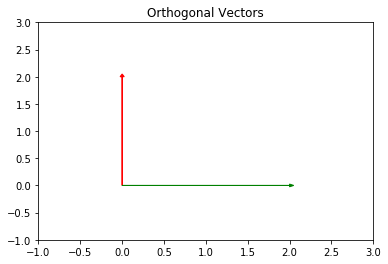

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#A synonym for orthogonal is perpindicular.
vector_1 = [0, 2]
vector_2 = [2, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='green')
plt.xlim(-1,3)          
plt.ylim(-1,3)
plt.title("Orthogonal Vectors")
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

We determine whether vectors are orthogonal by find ing the dot product of the vectors.

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
#To determine if vectors are orthogonal calculate the dot product
#Vectors are orthogonal only if the dot product is zero

import numpy as np

a = [-5, 3, 7]
b = [6, -8, 2]

np.dot(a, b)

#Dot product is not zero so vectors are not orthogonal. 

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [35]:
from numpy import linalg as LA

c = [2, -15, 6, 20]

cn = LA.norm(c)
c_2 = cn**2
print(c_2)

#np.matmul(c,c)

ct = np.transpose(c)

np.matmul(ct, c)

665.0


665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [21]:
#Turn any non-zero vector into a unit vector by dividing it by its norm(length)

# a linear combination is a format of a specific equation
#2i^ + 3j^ --coefficient/variable pairs, added or subtracted from each other
#linear regressions are written in the form of linear combinations
#(linear regressions get their name from the format of the equation, not
#because they fit to a line.)

d=[7,12]

e=[2, 11, -8]

nd=LA.norm(d)
ne=LA.norm(e)

print(nd)



13.892443989449804


Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [24]:
# any vector can be turned into a unit vector if you divide it by its norm
#vector
f = [4, 12, 11, 9, 2]

#get the norm
nf = LA.norm(f)

#divide vector by norm
uv = f/nf

print (uv)

[0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

###Linearly dependnent vectors are on the same line.

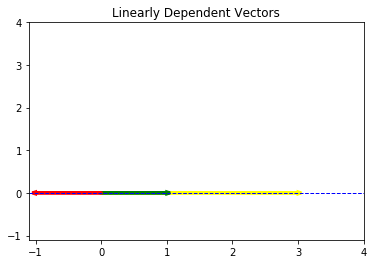

In [27]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-1.1,4)          
plt.ylim(-1.1,4)

# Original Vector
v = [1,0] 

# Scaled Vectors
v2 = np.multiply(3, v)
v3 = np.multiply(-1,v)

# Get Vals for L
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = 0*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, v2[0], v2[1], linewidth=3, head_width=.05, head_length=0.05, color ='yellow')
plt.arrow(0,0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, v3[0], v3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

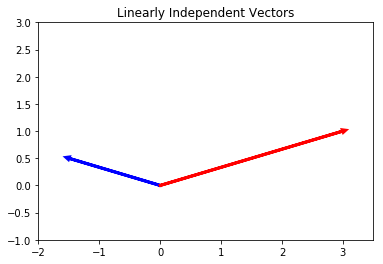

In [25]:
# Plot Linearly Dependent Vectors

# Axis Bounds
plt.xlim(-2,3.5)          
plt.ylim(-1,3)

# Original Vector
a = [-1.5,.5] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

The rank of a matrix is teh dimension of the vector space spanned by its columns. To find the Span you must first find the rank. Rank answers questions about span. 1:35 in lecture

Note that these vectors are linearly dependent. 

They span the line the fall on.

The span of these is 1 because they fall on the same line.

To get the rank you perform Gaussian elimination or row reduction. 

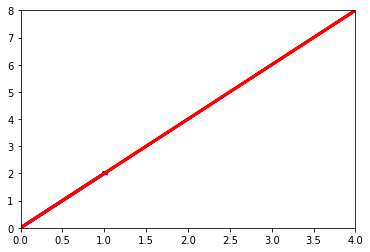

In [30]:
plt.xlim(0,4)          
plt.ylim(0,8)

g = [1,2]
h = [4,8]

# Plot Vectors
plt.arrow(0,0, g[0], g[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, h[0], h[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

to find the span of these vectors we must first find their rank.
if we combine these vectos in a matrix whose row space is the above set of vectors
and then reduce 


(numpy does have functions for this)
Solve function which should get you to row eheclon form (hard to use)

Also rank function

If determinant is zero it would singify linear dependence. You will never have 3 that are the same, the rank of a matrix has to always at least be 1.

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Basis
The basis of a vector space(group of vectors) is a set of vectors that are linearly indpendent and that span the vector space V.

A set of vectors spans a space if their linear combinations fill the space.


## Orthogonal Basis

An orthogonal basis is a set of vectors that are linearly independent, span the vector space, and are orthogonal to each other. Remember that vectors are orthogonal if their dot product equals zero.

## Orthonormal Basis

An orthonormal basis is a set of vectors that are linearly independent, span the vector space, are orthogonal to eachother and each have unit length. 

For more on this topic (it's thrilling, I know) you might research the Gram-Schmidt process -which is a method for orthonormalizing a set of vectors in an inner product space.

The unit vectors form an orthonormal basis for whatever vector space that they are spanning.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?
Rank answers questiosn about span. Already calculated above.

There is no redunancy and it is a full rank matrix, its rank is 3. 

This should have been determined previously when it was determined that this was three-dimensional space. 

We know from using an online calculator to reduce this matrix to row-echelon form that its row-echelon form is the identity matrix whic has 3 pivot values - therefore its rank is 3.

![alt text](https://)

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()